## CE9010: Introduction to Data Science
## Semester 2 2017/18
#### Chat Anan Potcharaphol (U1521216H)
## Course Project: Wine Quality Prediction

### Import libraries:

In [1]:
# Data analysis
import pandas as pd
# Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation
from sklearn.utils import shuffle
# use seed to specify random sequence (make random consistent)
seed = 2018
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Scoring parameter
from sklearn.metrics import mean_absolute_error

# Step 1: Identify a data problem

## Data source:
- UCI Machine Learning Repository
- Data is at this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)

In [2]:
# Define URLs of the dataset
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Define files' name
red_wine_file = "winequality-red.csv"
white_wine_file = "winequality-white.csv"

# Step 2: Data acquisition
- Download .csv files from the source

## Load raw data:

There are 2 raw data files:
  1. winequality-red.csv
  2. winequality-white.csv

- In this step, we add an additional attribute `'wine type'` to differentiate between the 2 wine types.
- We then combine the 2 data and shuffle them.
- We also separate the last 100 dataset to be a test set

**Take Note: **

- All fields are numerical data except for `'wine type'` which is categorical.

In [3]:
# Try to read .csv file in case the files are already downloaded once
try:
    data_red = pd.read_csv(red_wine_file, delimiter=';')
    data_white = pd.read_csv(white_wine_file, delimiter=';')
except FileNotFoundError:
    # Download the files if not found
    import urllib.request
    urllib.request.urlretrieve(red_wine_url, red_wine_file)
    urllib.request.urlretrieve(white_wine_url, white_wine_file)
    data_red = pd.read_csv(red_wine_file, delimiter=';')
    data_white = pd.read_csv(white_wine_file, delimiter=';')

# Insert "wine type" attribute
data_red.insert(loc=0, column='wine type', value='r')
data_white.insert(loc=0, column='wine type', value='w')

# Concatenate red and white wine data
dataset = pd.concat([data_red, data_white])

# Shuffle all dataset to mix red and white wine data
dataset = shuffle(dataset, random_state = seed).reset_index(drop=True)

# Use first 100 dataset as test set
n_test = 100
dataset_test = dataset.iloc[:n_test, :].reset_index(drop=True)
dataset_train = dataset.iloc[n_test:, :].reset_index(drop=True)

#Display the first 3 rows to get a feel of the data
print(dataset_train.head(3))

  wine type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0         r            8.9             0.745         0.18             2.5   
1         w            5.3             0.360         0.27             6.3   
2         w            6.4             0.230         0.35             4.6   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.077                 15.0                  48.0  0.99739  3.20   
1      0.028                 40.0                 132.0  0.99186  3.37   
2      0.039                 43.0                 147.0  0.99216  3.18   

   sulphates  alcohol  quality  
0       0.47      9.7        6  
1       0.40     11.6        6  
2       0.40     11.0        7  


# Step 3: Data Exploration
## 3.1 Data statistics:
- Shape
- Description
- Skewness

**Take Note: **

- We can see that there are 6397 instances having 13 attributes
- No attribute in continuous columns is missing as count is 6397 for all, all rows can be used
- No negative values are present
- Statistics not displayed for categorical data `'wine type'`
- Values close to 0 show less skew
- `'chlorides'` shows the highest skew. Let us vitualize it

In [4]:
print('Shape: ')
print(dataset_train.shape)
print('Description: ')
print(dataset_train.describe())
print('Skewness: ')
print(dataset_train.skew())

Shape: 
(6397, 13)
Description: 
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6397.000000       6397.000000  6397.000000     6397.000000   
mean        7.211857          0.339587     0.318537        5.449211   
std         1.294757          0.164790     0.145413        4.757905   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6397.000000          6397.000000           6397.000000  6397.000000   
mean      0.056037            30.513366            115.821557     0.994696   
std       0.035152            17.778021             56.560305     0.002998   
min       0.009

## 3.2 Data Visualization:
- Categorical attributes

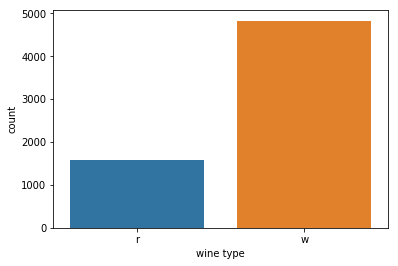

In [5]:
# Count of each label in wine type category

# Plot count plot
ax = sns.countplot(x='wine type', data=dataset_train)

# wine type has only two labels w and r

## 3.2 Data Visualization:
- Box and density plots

**Take Note: **

We will visualize all the continuous attributes using `Violin Plot` - a combination of box and density plots

Violin Plot shows the distribution of each attribute.

> For example:
>
> `'citric acid'` has many values close to 0.27
>
> `'total sulfur dioxide'` has a distinct pattern. 25 and 115 have a lot of concentration
>
> `'quality'` has a pattern where there are several spikes at specific points

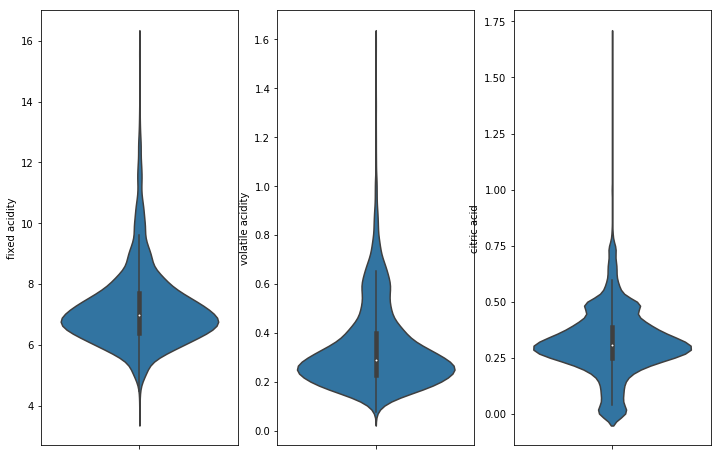

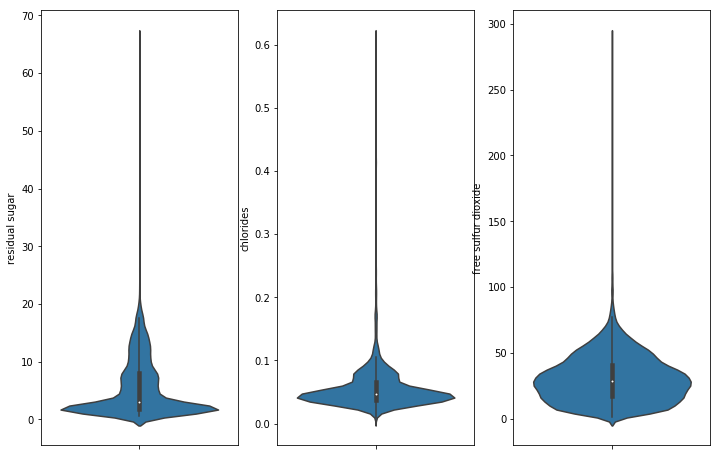

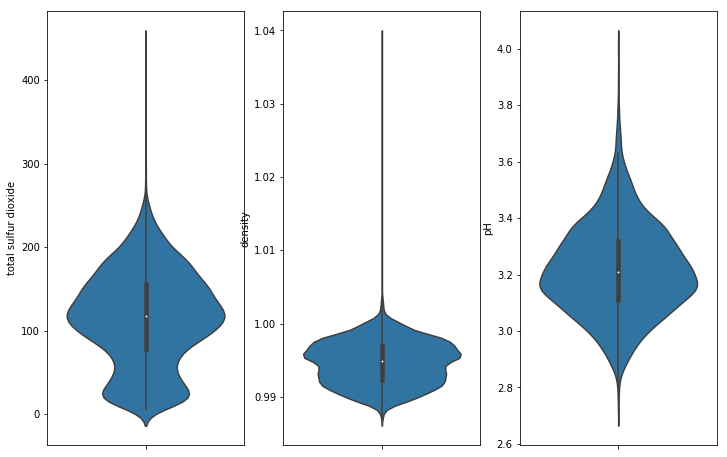

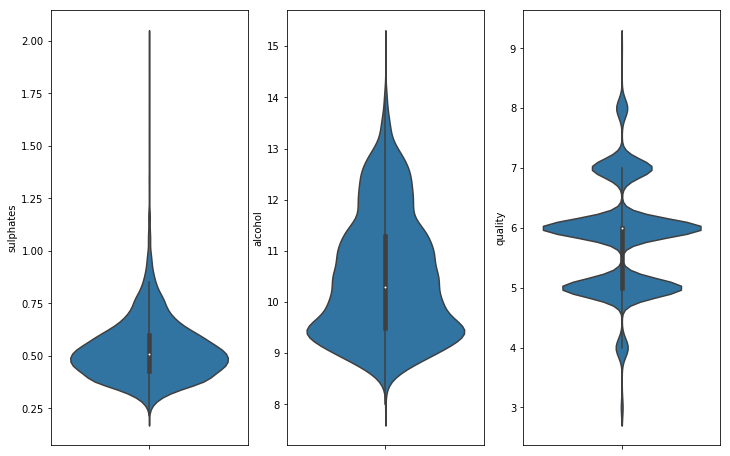

In [6]:
#create a dataframe with only continuous features

data = dataset_train.iloc[:,1:]

#get the names of all the columns
cols = data.columns

#Plot violin for all attributes in a 4x3 grid
n_cols = 3
n_rows = 4

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=dataset_train, ax=ax[j])

## 3.3 Data Interaction:
- Correlation
- Scatter plot

**Take Note: **
- Correlation tells relation between two attributes.
- Correlation requires continous data.

free sulfur dioxide and total sulfur dioxide = 0.72
density and alcohol = -0.69
residual sugar and density = 0.55


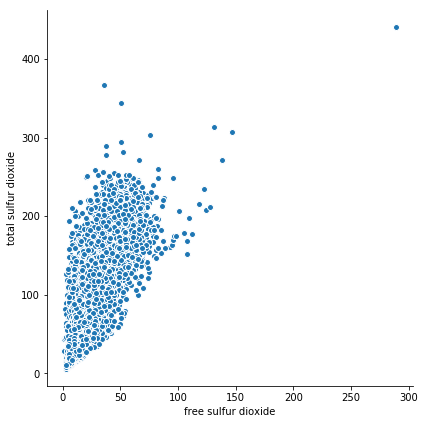

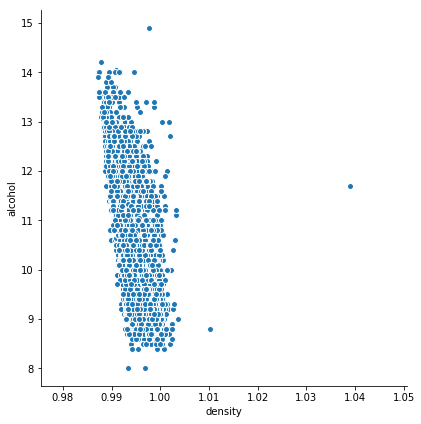

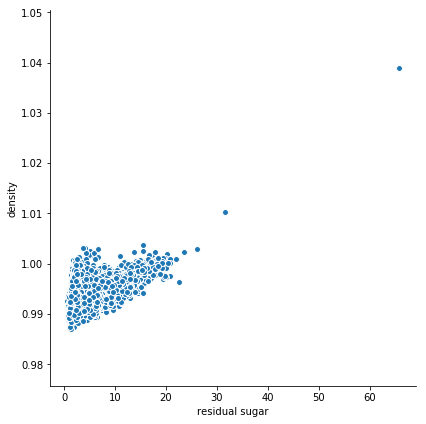

In [7]:
# Calculates Pearson correlation coefficient for all combinations
data_corr = data.corr()

# number of continuous fields
size = data_corr.shape[0]

# Set the threshold to select only highly correlated attributes (above 0.5)
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

# Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

# Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

# Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(dataset_train, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

# Step 4: Data Preprocessing
## 4.1 Data Transformation:
- Skew correction (for `'chlorides'`)
- The Skewness can be corrected using log shift method (here we use zero shift)

In [8]:
print('Skewness before correction: ')
print(dataset['chlorides'].skew())
dataset['chlorides'] = np.log(dataset['chlorides'])
print('Skewness after correction: ')
print(dataset['chlorides'].skew())

Skewness before correction: 
5.399827731969902
Skewness after correction: 
0.8764721609236968


## 4.2 Data Preparation:
- One Hot Encoding of categorical data

In [9]:
# one-hot encoding using get_dummies from pandas
dataset_encoded = pd.get_dummies(dataset)

# rearrange columns
cols = list(dataset_encoded.columns.values) # Make a list of all of the columns in the dataframe
cols.pop(cols.index('quality')) # Remove quality from list
dataset_encoded = dataset_encoded[cols+['quality']] # Create new dataframe with columns in the order you want

#Display the first five rows to get a feel of the data
print(dataset.head(5))
print(dataset_encoded.head(5))

  wine type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0         r            9.9              0.54         0.45             2.3   
1         r            6.4              0.36         0.53             2.2   
2         w            7.2              0.27         0.28            15.2   
3         w            8.0              0.40         0.33             7.7   
4         r           14.0              0.41         0.63             3.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0  -2.645075                 16.0                  40.0  0.99910  3.39   
1  -1.469676                 19.0                  35.0  0.99340  3.37   
2  -3.079114                  6.0                  41.0  0.99665  3.17   
3  -3.381395                 27.0                  98.0  0.99350  3.18   
4  -2.419119                  6.0                  47.0  1.00140  3.01   

   sulphates  alcohol  quality  
0       0.62      9.4        5  
1       0.93     12.4     

## 4.3 Data Standadization:
- Standadization (Z-scoring)

**Take Note: **

- mean becomes 0 and varience become 1
- Don't forget to inverse_transform after the prediction

In [10]:
dataset_test = dataset_encoded.iloc[:n_test, :].reset_index(drop=True)
dataset_train = dataset_encoded.iloc[n_test:, :].reset_index(drop=True)

X_train = dataset_train.iloc[:, :-1]
Y_train = dataset_train.iloc[:, -1:]
scaler_x = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(Y_train)

X_test = dataset_test.iloc[:, :-1]
Y_test = dataset_test.iloc[:, -1:]

clean_X_train = scaler_x.transform(X_train)
clean_Y_train = scaler_y.transform(Y_train)

clean_X_test = scaler_x.transform(X_test)
clean_Y_test = scaler_y.transform(Y_test)

XY_train = np.concatenate((clean_X_train, clean_Y_train), axis=1)
XY_test = np.concatenate((clean_X_test, clean_Y_test), axis=1) # we will not touch this until the end

print(np.mean(XY_train, axis = 0))
print(np.var(XY_train, axis = 0))

[ 1.82717336e-16 -3.22115669e-17 -8.05289172e-17 -1.66611553e-17
  2.89348730e-16  8.88594949e-18 -1.44396679e-17 -3.99995462e-14
 -4.14474006e-15 -2.12707416e-16  2.33811546e-16  8.55272638e-17
 -8.55272638e-17  7.77520580e-18]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 4.4 Data Preparation:
- Split into train and validation using k-fold method where k = 10

In [11]:
kf = KFold(n_splits=10, random_state=None, shuffle=False)

# Step 5: Data Analysis
- Define all models that we want to use

In [12]:
# List to store all algorithms (models)
models = []

## 5.1 Linear Regression (LR):

In [13]:
from sklearn.linear_model import LinearRegression

#Set the base model
model = LinearRegression(n_jobs=-1) # n_jobs=-1 all CPUs are used

temp = {}
temp['name'] = 'LR'
temp['model'] = model

models.append(temp)

## 5.2 K-Nearest Neighbors (KNN):
- Using k = [1, 2, 3, 4]

In [14]:
from sklearn.neighbors import KNeighborsRegressor

# n is the value of nearest neighbors
n_list = np.array(range(1,4))

for n_neighbors in n_list:
    #Set the base model
    model = KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=-1)
    
    temp = {}
    temp['name'] = "KNN" + str(n_neighbors)
    temp['model'] = model
    
    models.append(temp)

## 5.3 Support Vector Regression (SVR):
- Using C = [10, 11, 12, ..., 19]

In [15]:
from sklearn.svm import SVR

#Add the C value to the below list if you want to run the algo
c_list = np.array(range(10,20))

for C in c_list:
    #Set the base model
    model = SVR(C=C)
    
    algo = "SVR"

    temp = {}
    temp['name'] = "SVR" + str(C)
    temp['model'] = model
    
    models.append(temp)

## 5.4 Artificial Neural Network:
- Neural Network (baseline, small, deeper)
- For each network, we train for 10 and 30 epoch

In [16]:
# Get dataset dimesion
r,c = XY_train.shape
#Import libraries for deep learning
try:
    from keras.wrappers.scikit_learn import KerasRegressor
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation
    from keras.layers.normalization import BatchNormalization
    from keras.layers.advanced_activations import PReLU

    # define baseline model
    def baseline(j):
        # create model
        model = Sequential()
        model.add(Dense(j, input_dim=j, kernel_initializer='normal', activation='relu'))
        model.add(Dense(1, kernel_initializer='normal'))
        # Compile model
        model.compile(loss='mean_absolute_error', optimizer='adam')
        return model

    # define smaller model
    def smaller(j):
        # create model
        model = Sequential()
        model.add(Dense(j//2, input_dim=j, activation="relu", kernel_initializer="normal"))
        model.add(Dense(1, kernel_initializer="normal"))
        # Compile model
        model.compile(loss='mean_absolute_error', optimizer='adam')
        return model

    # define deeper model
    def deeper(j):
        # create model
        model = Sequential()
        model.add(Dense(j, input_dim=j, kernel_initializer='normal', activation='relu'))
        model.add(Dense(j//2, kernel_initializer='normal', activation='relu'))
        model.add(Dense(1, kernel_initializer='normal', activation='relu'))
        # Compile model
        model.compile(loss='mean_absolute_error', optimizer='adam')
        return model

    est_list = [('baseline',baseline),('smaller',smaller),('deeper',deeper)]

    for name, est in est_list:

        algo = name

        #Accuracy of the model using all features
        for n in [5, 10, 20]:
            model = KerasRegressor(build_fn=est, j=c-1, nb_epoch=n, verbose=0)

            temp = {}
            temp['name'] = algo + str(n)
            temp['model'] = model

            models.append(temp)
except ModuleNotFoundError:
    print('Tensorflow is not installed with GUP support.')

Using TensorFlow backend.


## 5.5 Run models:

In [17]:
import pickle

try:
    with open('../result/model_result', "rb") as f:
        model_result = pickle.load(f)
    
    for key, value in model_result.items():
        print("Model: %-10s MAE: %-10.8f" %(key, value))
        #print(key + " %s" % value)
except FileNotFoundError:
    model_result = {}

    for d in models:
        model = d['model']
        name = d['name']
        
        print("executing" + name)
        mae = []
        for train_idx, val_idx in kf.split(XY_train):
                X_train = XY_train[train_idx,:-1]
                X_val = XY_train[val_idx,:-1]
                Y_train = XY_train[train_idx,-1]
                Y_val = XY_train[val_idx,-1]
                model.fit(X_train,Y_train)
                pred = model.predict(X_val)
                inverse_pred = scaler_y.inverse_transform(pred)
                result = mean_absolute_error(scaler_y.inverse_transform(Y_val), np.around(inverse_pred))
                mae.append(result)

        mean = np.mean(mae)
        print(name + " %s" % mean)
        model_result[name] = mean
    
    with open('../result/model_result', "wb") as f:
        pickle.dump(model_result, f)

Model: LR         MAE: 0.52102088
Model: KNN1       MAE: 0.42582160
Model: KNN2       MAE: 0.48272521
Model: KNN3       MAE: 0.47850694
Model: SVR10      MAE: 0.44239486
Model: SVR11      MAE: 0.44130086
Model: SVR12      MAE: 0.43958162
Model: SVR13      MAE: 0.43880013
Model: SVR14      MAE: 0.43958187
Model: SVR15      MAE: 0.43973738
Model: SVR16      MAE: 0.44036336
Model: SVR17      MAE: 0.44130086
Model: SVR18      MAE: 0.44177059
Model: SVR19      MAE: 0.44176986
Model: baseline5  MAE: 0.60215669
Model: baseline10 MAE: 0.60965865
Model: baseline20 MAE: 0.61170237
Model: smaller5   MAE: 0.62904294
Model: smaller10  MAE: 0.63311057
Model: smaller20  MAE: 0.63592283
Model: deeper5    MAE: 0.63623582
Model: deeper10   MAE: 0.63623582
Model: deeper20   MAE: 0.63623582


# Step 6: Analysis of Results
## 6.1 Select Best Model:
- Select the model that gives lowest MAE

**Result: **

- The best model is SVR with parameter C = 14

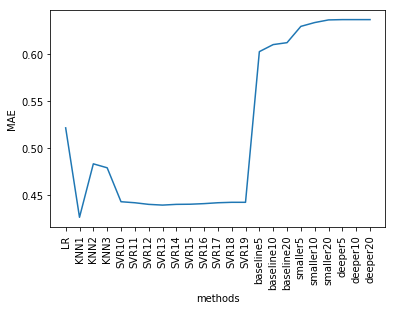

Model with minimum MAE: KNN1


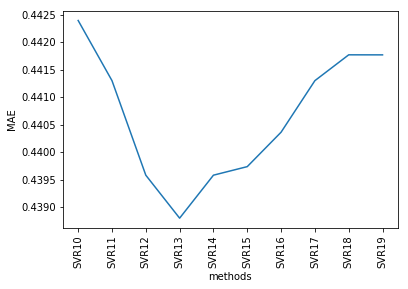

In [18]:
keys = model_result.keys()
values = model_result.values()
#Plot the MAE of all models
fig, ax = plt.subplots()
plt.plot(values)
plt.xlabel('methods')
plt.ylabel('MAE')
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys,rotation='vertical')
plt.show()

best_model_name = min(model_result.keys(), key=(lambda key: model_result[key]))
print('Model with minimum MAE: ' + best_model_name)


svr_model_result = {}
for k,v in model_result.items():
    if 'SVR' in k:
        svr_model_result[k] = v
        

svr_keys = svr_model_result.keys()
svr_values = svr_model_result.values()
#Plot the MAE of all models
fig, ax = plt.subplots()
plt.plot(svr_values)
plt.xlabel('methods')
plt.ylabel('MAE')
ax.set_xticks(range(len(svr_keys)))
ax.set_xticklabels(svr_keys,rotation='vertical')
plt.show()

## 6.2 Make Predictions:
- The SVR model is able to predict wine quality with 71% accuracy
- If we allow error of +- 1, the model is 100% accurate

In [19]:
X = XY_train[:,:-1]
Y = XY_train[:,-1]

#Best model definition
best_model = KNeighborsRegressor(n_neighbors=1, n_jobs=-1)
best_model.fit(X,Y)

X_test = XY_test[:,:-1]
Y_test = XY_test[:,-1]
Y_predict = best_model.predict(X_test)

inverse_pred = scaler_y.inverse_transform(Y_predict)
predictions = np.around(inverse_pred)
targets = scaler_y.inverse_transform(Y_test)
result = mean_absolute_error(targets, predictions)

print("MAE: " + str(result))

percent_threshold = 0
accuracy = 0
for i in range(targets.shape[0]):
    if targets[i] - 1 <= predictions[i] and  predictions[i] <= targets[i] + 1:
        percent_threshold += 1
    if targets[i] == predictions[i]:
        accuracy += 1
        
print("Accuracy: " + str(accuracy/100))
print("Accuracy +- 1: " + str(percent_threshold/100))

MAE: 0.37
Accuracy: 0.7
Accuracy +- 1: 0.93
